# Smilestone Data Notebook
If you know, you know. 😉

## Project Setup

In [26]:
# Importing the required Python libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
# Defining the ID of the Google Sheet with the movie ratings
sheet_id = '1-8tdDUtm0iBrCdCRAsYCw2KOimecrHcmsnL-aqG-l0E'

# Creating a small function to load the data sheet by ID and sheet name
def load_google_sheet(sheet_id, sheet_name):
    url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
    df = pd.read_csv(url)
    return df

# Loading all the sheets and joining them together
df_main = load_google_sheet(sheet_id, 'main')
df_patreon = load_google_sheet(sheet_id, 'patreon')
df_mnight = load_google_sheet(sheet_id, 'movie_night')
df = pd.concat([df_main, df_patreon, df_mnight], axis = 0)

## Parsing Down Data

In [23]:
df_main = df_main[(df_main['Episode Number'] <= (69 * 4))]
df_main = df_main[(df_main['Episode Number'] > (69 * 3))]

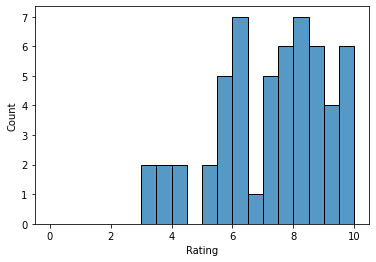

In [67]:
sb.histplot(df_main['Rating'], bins = [0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]);

C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


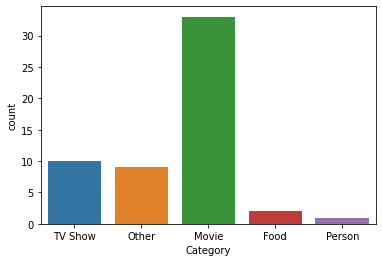

In [76]:
sb.countplot(df_main['Category'], orient = 'v');

In [77]:
df_main['Category'].value_counts()

Movie      33
TV Show    10
Other       9
Food        2
Person      1
Name: Category, dtype: int64

In [58]:
(df_main[df_main['Rating'] > 9]).sort_values(by = ['Rating'])

,Name,Category,Rating,Flickable,Episode Number,Notes
268,Caelan's second daughter,Person,9.1,Yes,246,NaN
273,Doctor Sleep,Movie,9.1,Yes,251,NaN
276,Borat Subsequent Moviefilm,Movie,9.3,Yes,256,NaN
251,Starship Troopers,Movie,9.4,Yes,222,NaN
272,The Social Dilemma,Movie,9.6,Yes,250,NaN
257,Jumanji,Movie,9.7,Yes,230,NaN
269,Some cold cut from some unnamed Italian deli,Food,9.7,Yes,246,NaN
285,The Mandalorian (Season 2),TV Show,9.7,Yes,263,NaN
263,The Biehn scale itself,Other,9.9,Yes,239,As requested by Jeff Cesario
286,Michelle Pfeiffer as Catwoman,Other,10.0,Yes,263,NaN


In [50]:
df_main[df_main['Rating'] < 4]

,Name,Category,Rating,Flickable,Episode Number,Notes
243,The Hunt,Movie,3.5,No,210,NaN
259,Jumanji: Next Level,Movie,3.0,No,230,"Technically scored by Matt, but Caelan officia..."
270,Project Power,Movie,3.9,No,247,NaN
271,An American Pickle,Movie,3.2,No,249,NaN


In [79]:
df_main[df_main['Category'] == 'Other']

,Name,Category,Rating,Flickable,Episode Number,Notes
242,Being in quarantine,Other,5.5,Yes,209,First show when COVID hit big
263,The Biehn scale itself,Other,9.9,Yes,239,As requested by Jeff Cesario
277,Turquoise (the color),Other,7.1,No,257,The Biehn Scale game!
278,Uranium,Other,8.8,Yes,257,NaN
279,Mac n cheese on Thanksgiving,Other,8.6,No,257,NaN
280,Mercury (the planet),Other,4.4,No,257,"""What a boring planet."""
281,Birds,Other,7.7,Yes,257,NaN
286,Michelle Pfeiffer as Catwoman,Other,10.0,Yes,263,NaN
295,The Last Blockbuster,Other,6.1,Yes,276,The 4 banger
